In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale

# from dbgsom.dbgsom_ import DBGSOM
from dbgsom.SomVQ import SomVQ

In [48]:
data = scale(np.load("F:\Dokumente\git\dbgsomneu\DBGSOM\examples\clusterable_data.npy"))
som = SomVQ(
    n_iter=200,
    spreading_factor=0.5,
    sigma_end=0.5,
    convergence_iter=10,
    random_state=32,
    verbose=True,
    max_neurons=200,
)
som.fit(data)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sandro\AppData\Local\Temp\ipykernel_29340\471272846.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = scale(np.load("F:\Dokumente\git\dbgsomneu\DBGSOM\examples\clusterable_data.npy"))
 68%|██████▊   | 137/200 [00:00<00:00, 483.99 epochs/s]


SomVQ(convergence_iter=10, max_neurons=200, random_state=32, sigma_end=0.5,
      verbose=True)

0.0008661758336942399


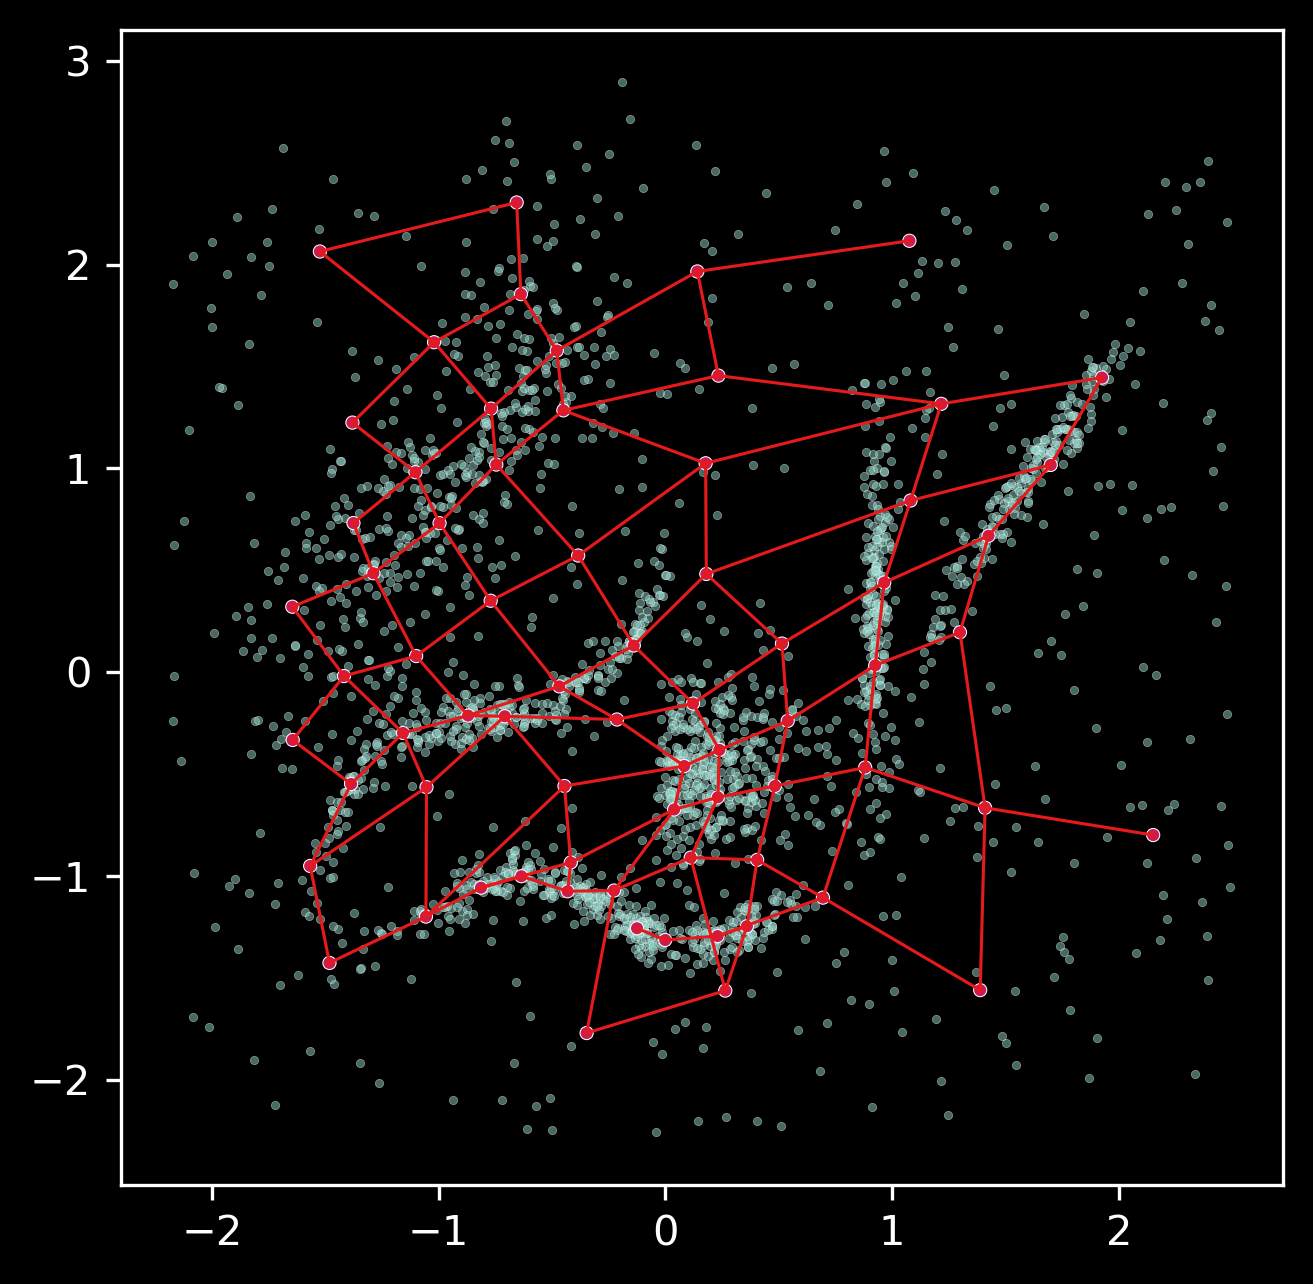

In [49]:
edges = list(som.som_.edges)
weights = som.weights_
f = plt.figure(figsize=(5, 5), dpi=300, edgecolor="red")
for edge in edges:
    sns.lineplot(
        x=[
            som.som_.nodes().data()[edge[0]]["weight"][0],
            som.som_.nodes().data()[edge[1]]["weight"][0],
        ],
        y=[
            som.som_.nodes().data()[edge[0]]["weight"][1],
            som.som_.nodes().data()[edge[1]]["weight"][1],
        ],
        size=1,
        legend=False,
        hue=[4] * 2,
        palette="Set1",
    )

sns.scatterplot(x=data[:, 0], y=data[:, 1], s=4, alpha=0.5)

sns.scatterplot(
    x=weights[:, 0],
    y=weights[:, 1],
    hue=[1] * len(som.neurons_),
    palette="rocket",
    s=10,
    legend=False,
)
print(som.topographic_error_)
# plt.savefig("2d_example.png")